# Lambda Function

Construct and plot the lambda function, defined as:
$$
\Lambda(q,x) := \sum_{i=0}^{n} |l_i(x)| 
$$

In [82]:
# This is used for plots and numpy
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [83]:
def lagrange_basis(xi, i):  
    def func(x):
        assert i<len(xi) and i>=0, 'Out of range: 0 < i < len(xi)'
        ret = 1;
        for j in range(len(xi)):
            if j != i:
                ret *= (x-xi[j])/(xi[i]-xi[j])
        return ret
    return func

Test your implementation, plotting $l_i(x)$ for five equally spaced points.

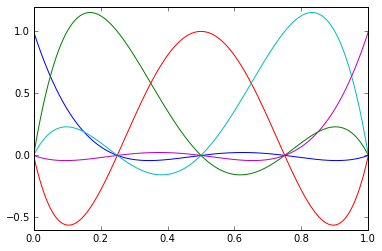

In [85]:
xi = np.linspace(0,1,5)
x  = np.linspace(0,1,1000)
_ = [plt.plot(x,lagrange_basis(xi,i)(x)) for i in range(5)]

In [86]:
xi = np.linspace(0,1,5)
x  = np.linspace(0,1,1000)
_ = [plt.plot(x,lagrange_basis(xi,i)(x)) for i in range(5)]

In [ ]:
def lambda_function(q):
    def func(x):
        ret = 0;
        for i in range(len(q)):
            ret = ret + abs(lagrange_basis(q, i)(x))
        return ret
    return func

In [87]:
from numpy.testing import *

assert_equal(lambda_function(linspace(0,1,3))(.25),1.25)
assert_almost_equal(lambda_function(linspace(0,1,5))(.3),1.2464,decimal=8)

Plot $\Lambda(q)(x)$ for equispaced nodes on the interval $[0,1]$ for 3, 5, and 7 equispaced nodes respectively. Comment the result.

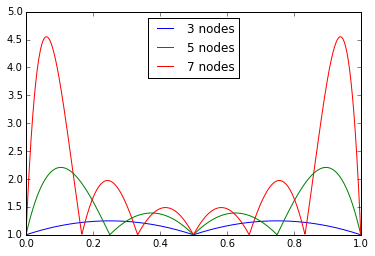

In [89]:
for nnodes in [3,5,7]:
    q = np.linspace(0,1,nnodes)
    x  = np.linspace(0,1,1000)
    _ = plt.plot(x,lambda_function(q)(x),label=str(nnodes)+' nodes')
    _ = plt.legend(loc=0)

YOUR ANSWER HERE

## Chebyshev Nodes

Chebyshev nodes are defined as:
$$
x_k = cos\left(\frac{2k-1}{2n} \pi \right), k = 1,\ldots,n.
$$
Write a function to evaluate then for a given $n$.


In [90]:
chebyshev_nodes = lambda n: [ np.cos((2.0*k-1.0)/(2.0*n)*np.pi) for k in range(1,n+1) ]

In [91]:
assert_almost_equal(chebyshev_nodes(5),[  9.51056516e-01, 5.87785252e-01,   6.12323400e-17,  -5.87785252e-01,
  -9.51056516e-01],decimal=8)
assert_almost_equal(chebyshev_nodes(7),[  9.74927912e-01,   7.81831482e-01,   4.33883739e-01,   6.12323400e-17,
  -4.33883739e-01,  -7.81831482e-01,  -9.74927912e-01],decimal=8)


Plot the location of chebyshev nodes on the unit circle, and on the orizontal axis.

 - plot the positive sector of a cirumference with center $0$ and radius $1$.
 - plot the location of chebicev points on the cirumference, suggested plot option is `'*'`.
 - plot projection lines from the circle center to chebyshev nodes projected on the circumference.
 - plot projection lines from chebyshev nodes projected on the circumference to chebyshev nodes on the horizontal axis.
 - plot chebyshev nodes, suggested plot option is `'o'`.
 - make sure the axis are such that the resulting plot is truly a circle...

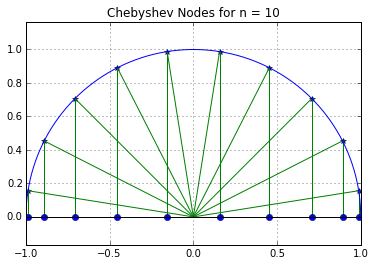

In [178]:
def node_projection(n):
    x_nodes = chebyshev_nodes(n)
    y_nodes = circ(np.array(x_nodes))
    _ = plt.plot(x_nodes,y_nodes,'*b')
    _ = []
    for i in range(n):
        _ = plt.plot([0,x_nodes[i]],[0,y_nodes[i]],'g-')
        _ = plt.plot([x_nodes[i]]*2,[0,y_nodes[i]],'g-')
    _ = plt.plot(x_nodes,y_nodes*0,'o')
    _ = plt.title("Chebyshev Nodes for n = "+str(n))

x = np.linspace(-1,1,1000)
circ = lambda x: np.sqrt(1-x**2)

_ = node_projection(10)
_ = plt.plot(x,circ(x),'b')
_ = plt.plot(x,x*0,'k')
_ = plt.axes().set_aspect('equal', 'datalim')
# _ = plt.axis('off')
_ = plt.grid(True)

Plot $\Lambda(q)(x)$ for chebyshev nodes on the interval $[x_0,x_n]$ for 3, 5, and 7 nodes respectively. Comment the result.

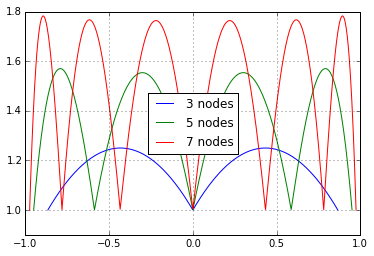

In [179]:
for nnodes in [3,5,7]:
    q = chebyshev_nodes(nnodes)
    x  = np.linspace(q[0],q[-1],1000)
    _ = plt.plot(x,lambda_function(q)(x),label=str(nnodes)+' nodes')
    _ = plt.legend(loc=0)
    _ = plt.grid(True)

YOUR ANSWER HERE

Define a function `function_norm` that returns $||f(x)||\infty$ with $x\in[a,b]$ (default to $[0,1]$). To keep the implementation simple, evaluate the given function over $2^n+1$ points and return the maximum value. Any smarter and correct implementation is welcome. $n$ should be selectable at run time, and it should be by default equal to 20 (rhoughly a million points)

In [173]:
def function_norm(f,a=0,b=1,n=20):
    x = np.linspace(a,b,2**n+1)
    return np.max(f(x))

function_norm(np.sin,b=20)

0.99999999999979539

In [175]:
print( lambda_function(linspace(0,1,7))(.2))
print( lambda_function(linspace(0,1,7))(linspace(0,1,2**2+1)))
assert_almost_equal(function_norm(lambda_function(linspace(0,1,7)),0,1,10),4.54922445348, decimal=5)
assert_almost_equal(function_norm(lambda_function(linspace(0,1,5)),0,1,10),2.20780651848, decimal=5)

xi = chebyshev_nodes(7)
assert_almost_equal(function_norm(lambda_function(xi),xi[0],xi[-1]),1.78252988655, decimal=5)

xi = chebyshev_nodes(5)
assert_almost_equal(function_norm(lambda_function(xi),xi[0],xi[-1]),1.57016748842, decimal=5)

1.66304
[ 1.          1.96679688  1.          1.96679688  1.        ]


Evaluate the $||\Lambda(q)||_{\infty}$ for degree from 1 to 7, for equispaced points, and for chebyshev nodes. Store the corresponding values in two different arrays `norm_l_eq`, and `norm_l_ch`.

In [188]:
norm_l_eq = [ function_norm(lambda_function(q)) for q in [ np.linspace(0,1,nnodes) for nnodes in range(1,8) ] ]
norm_l_ch = [ function_norm(lambda_function(q),q[0],q[-1]) for q in [ chebyshev_nodes(nnodes) for nnodes in range(1,8) ] ]

In [190]:
assert_almost_equal(norm_l_eq,[1.,1.,1.25,1.63113031,2.2078244,3.10630116,4.54934179], decimal=5)
assert_almost_equal(norm_l_ch,[1.,1.,1.25,1.42987272,1.57016749,1.68514046,1.78252989], decimal=5)

Plot the $||\Lambda(q,x)||_{\infty}$ for degree from 1 to 7, for equispaced points, and for chebyshev nodes.

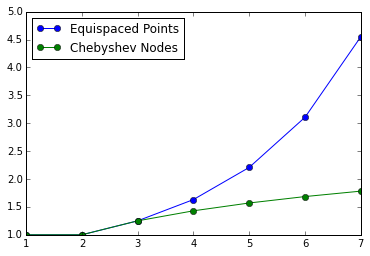

In [205]:
nnodes = range(1,8)
_ = plt.plot(nnodes,norm_l_eq,'o-',label='Equispaced Points')
_ = plt.plot(nnodes,norm_l_ch,'o-',label='Chebyshev Nodes')
_ = plt.legend(loc=0)

# Bernstein Basis
Write a function that returns the ith Bernstein Basis of order $n$, using the standard definition: 
$$
B_{i,n}(t) = \binom{n}{i} t^i(1-t)^{n-i}
$$

In [222]:
from scipy.misc import comb
bernstein_polynomial = lambda n,i: lambda t: comb(n,i)*(t**i)*(1-t)**(n-i)

In [224]:
expected = [[0.48999999999999994, 0.42, 0.09], [0.3429999999999999, 0.4409999999999999, 0.189, 0.026999999999999996], [0.24009999999999995, 0.4115999999999999, 0.2646, 0.07559999999999999, 0.0081], [0.16806999999999994, 0.3601499999999999, 0.3086999999999999, 0.13229999999999997, 0.028349999999999993, 0.0024299999999999994]]

for n in range(2,3):
    for i in range(0,n+1):
        b = bernstein_polynomial(n,i)
        assert_almost_equal(b(.3),expected[n-2][i],decimal=8)

Implement the recursive definition of the bernstein polynomial:
$$
B_{k,n}(t) = (1-t)\cdot B_{k,n-1}(t)+t\cdot B_{k-1,n-1}(t)
$$

 - if $k < 0\ \mathrm{or}\ i > n$ then $B_{k,n} = 0$. 
 - if $k = 0\ \mathrm{and}\ n =0$ then $B_{k,n} = 1$. 

In [235]:
bernstein_recursive = lambda n,k: lambda t: 0 if (k<0 or k>n) else 1 if (k==0 and n==0) else \
                                        (1-t) * bernstein_recursive(n-1,k)(t) + t*bernstein_recursive(n-1,k-1)(t)

In [240]:
expected = [[0.48999999999999994, 0.42, 0.09], [0.3429999999999999, 0.4409999999999999, 0.189, 0.026999999999999996], [0.24009999999999995, 0.4115999999999999, 0.2646, 0.07559999999999999, 0.0081], [0.16806999999999994, 0.3601499999999999, 0.3086999999999999, 0.13229999999999997, 0.028349999999999993, 0.0024299999999999994]]

for n in range(2,3):
    for i in range(0,n+1):
        b = bernstein_recursive(n,i)
        assert_almost_equal(b(.3),expected[n-2][i],decimal=8)

Implement power basis formula:
$$
B_{k,n}(t) = \sum_{i=k}^n(-1)^{i-k}\binom{n}{i}\binom{i}{k}t^i
$$

In [278]:
from scipy.misc import comb
bernstein_power_basis = lambda n,k: lambda t: sum([ (-1)**(i-k)*comb(n,i)*comb(i,k)*t**i for i in range(k,n+1)])

In [279]:
expected = [[0.48999999999999994, 0.42, 0.09], [0.3429999999999999, 0.4409999999999999, 0.189, 0.026999999999999996], [0.24009999999999995, 0.4115999999999999, 0.2646, 0.07559999999999999, 0.0081], [0.16806999999999994, 0.3601499999999999, 0.3086999999999999, 0.13229999999999997, 0.028349999999999993, 0.0024299999999999994]]

for n in range(2,3):
    for i in range(0,n+1):
        b = bernstein_power_basis(n,i)
        assert_almost_equal(b(.3),expected[n-2][i],decimal=8)

Plot all basis obtained through the "definition" implementation and through the "power basis" implementation for n=20,40,80,100. Give an explanation for what you observe.

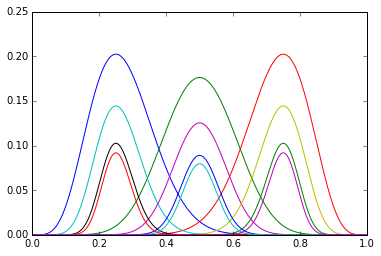

In [396]:
x = np.linspace(0,1,1000)
_ = [[plt.plot(x,bernstein_polynomial(n,k)(x),label=r'$B_{'+str(n)+','+str(k)+'}$') for k in [int(n/4),int(n/2),int(n*3/4)]] for n in [20,40,80,100]]
# _ = [[plt.plot(x,bernstein_recursive(n,k)(x),label=r'$B_{'+str(n)+','+str(k)+'}$') for k in [int(n/4),int(n/2),int(n*3/4)]] for n in [20,40,80,100]]
# _ = [[plt.plot(x,[bernstein_power_basis(n,k)(xi) for xi in x],label=r'$B_{'+str(n)+','+str(k)+'}$') for k in [int(n/4),int(n/2),int(n*3/4)]] for n in [20,40,80,100]]
# _ = plt.legend(loc=0)

YOUR ANSWER HERE

Given the basis functions above, construct the Bernstein approximation of a continuous function, defined as:
$$
B_n(f)(t) := \sum_{i=0}^{n} B_{i,n} (t) * f(i/n) 
$$

In [331]:
bernstein_interpolation = lambda n,f: lambda t: np.array([ bernstein_polynomial(n,i)(t) * f(i/n) 
                                                          for i in range(n+1)]).sum(axis=0)

In [330]:
func = lambda t : sin(2*pi*t)
bi = bernstein_interpolation(3,func)
expected = [  0.00000000e+00,1.92450090e-01,-1.92450090e-01,-2.44929360e-16]
assert_almost_equal(bi(linspace(0,1,4)),expected,decimal=8)
bi = bernstein_interpolation(15,func)
expected = [  0.00000000e+00,6.50601790e-01,-6.50601790e-01,-2.44929360e-16]
assert_almost_equal(bi(linspace(0,1,4)),expected,decimal=8)

Test your implementation, plotting the bernstein interpolation of $\sin(2\pi x)$ for different degrees:

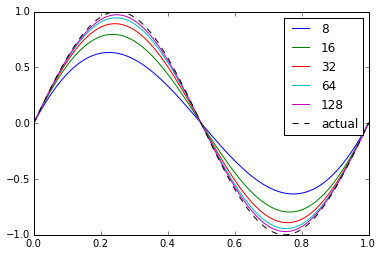

In [357]:
x = linspace(0,1,1000)
_ =[plt.plot(x,bernstein_interpolation(n, func)(x),label=n) for n in 2**arange(3,8)]
# plot(x,y)
_ = plt.plot(x,func(x),'--k',label='actual')
_ = plt.legend(loc=0)


Given tolerance `tol` for the the function `func`, find the order $n$ that satisfies $\mathtt{tol}<||f(x)||_\infty$. Use the `function_norm` previously implemented.

In [393]:
def find_order_given_tolerance(func,tol):
    flag = True
    n = 1
    while flag:
        test = function_norm(bernstein_interpolation(n, func))
        print(n,test)
        if tol < test:
            flag = False
        else:
            n += 1
    
    return n

In [394]:
func = lambda t : sin(2*pi*t)
assert_equal(find_order_given_tolerance(func,.05),77)

h = lambda x: abs(x-.5)
assert_equal(find_order_given_tolerance(h,.05),64)

g = lambda x: 1/(1+(10*x-5)**2)
assert_equal(find_order_given_tolerance(g,.1),187)

1 0.0
2 3.06161699787e-17
3 0.25


AssertionError: 
Items are not equal:
 ACTUAL: 3
 DESIRED: 77

In [359]:
function_norm?

In [ ]:
function_norm?